In [1]:
## Assignment 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('data3.csv')
df.head()

MARSTAT  EDUCATION  NUMHH  INCOME     FACE
0        1         16      3   43000    20000
1        1          9      3   12000   130000
2        1         16      5  120000  1500000
3        1         17      4   40000    50000
4        1         15      2   25000        0

In [34]:
df = df[df['FACE']>= 50000]
df.head()

MARSTAT  EDUCATION  NUMHH  INCOME     FACE
1        1          9      3   12000   130000
2        1         16      5  120000  1500000
3        1         17      4   40000    50000
5        2         11      4   28000   220000
7        1         16      3  100000   600000

In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'box-cox', standardize = False)

FACEbc = np.array(df['FACE'])
FACEbc = FACEbc.reshape(-1,1)

pt.fit(FACEbc)

FACEbc = pt.transform(FACEbc)
df['FACEbc'] = FACEbc

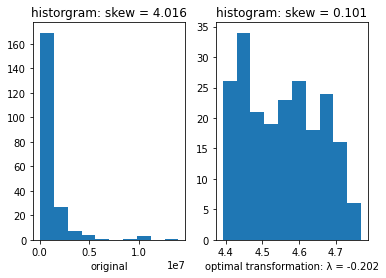

In [36]:
skew1 = round(df['FACE'].skew(),3)
skew2 = round(df['FACEbc'].skew(),3)
lambdas = pt.lambdas_[0]

f, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(df['FACE'])
ax1.set_title('historgram: skew = %s' % skew1)
ax1.set_xlabel('original')

ax2.hist(df['FACEbc'])
ax2.set_title('histogram: skew = %s' % skew2)
ax2.set_xlabel('optimal transformation: %s = %s' % (chr(0x03BB), round(lambdas,3)))

plt.show()

In [37]:
df = pd.get_dummies(df, columns = ['MARSTAT'])
df['logINCOME'] = np.log(df['INCOME'])
df.head()

EDUCATION  NUMHH  INCOME     FACE    FACEbc  MARSTAT_0  MARSTAT_1  \
1          9      3   12000   130000  4.489410          0          1   
2         16      5  120000  1500000  4.667959          0          1   
3         17      4   40000    50000  4.391879          0          1   
5         11      4   28000   220000  4.535591          0          0   
7         16      3  100000   600000  4.611143          0          1   

   MARSTAT_2  logINCOME  
1          0   9.392662  
2          0  11.695247  
3          0  10.596635  
5          1  10.239960  
7          0  11.512925

In [38]:
from sklearn.linear_model import LinearRegression

x = df[['EDUCATION', 'NUMHH', 'logINCOME', 'MARSTAT_0', 'MARSTAT_2']]
y = df['FACEbc']

reg = LinearRegression().fit(x,y)

B = reg.coef_
B = np.insert(B, 0, reg.intercept_, axis=0)
print(B)

SE = np.std(y, ddof=1)
print(SE)

y_pred = reg.predict(x)
from sklearn.metrics import r2_score
R2 = r2_score(y, y_pred)
print(R2)

[ 4.054996    0.01335962  0.00759392  0.02511296 -0.04642982 -0.01841342]
0.10323297449402534
0.33359974845365026


In [39]:
import statsmodels.api as sm

x = df[['EDUCATION', 'NUMHH', 'logINCOME', 'MARSTAT_0', 'MARSTAT_2']]
y = df['FACEbc']

x = sm.add_constant(x)

lm = sm.OLS(y,x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                 FACEbc   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     20.72
Date:                Tue, 08 Mar 2022   Prob (F-statistic):           9.13e-17
Time:                        21:29:19   Log-Likelihood:                 225.17
No. Observations:                 213   AIC:                            -438.3
Df Residuals:                     207   BIC:                            -418.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0550      0.060     67.405      0.0

In [40]:
#x = df[['EDUCATION', 'NUMHH', 'logINCOME', 'MARSTAT_0', 'MARSTAT_2']]

x_test = np.array([['16', '4', np.log(120000), '0', '1']])
y_test = reg.predict(x_test)

C:\Users\Woon\Documents\env_ds_3_10\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Woon\Documents\env_ds_3_10\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [41]:
lower = y_test - SE
upper = y_test + SE

In [42]:
y_test_final = y_test.reshape(-1,1)
y_test_final = pt.inverse_transform(y_test_final)

lower_final = lower.reshape(-1,1)
lower_final = pt.inverse_transform(lower_final)

upper_final = upper.reshape(-1,1)
upper_final = pt.inverse_transform(upper_final)

In [43]:
print(lower_final)
print(upper_final)
print(y_test_final)

[[107163.68455263]]
[[1786342.69872966]]
[[359158.34297235]]


In [44]:
## Assignment 4

In [256]:
df = pd.read_csv('data4.csv')

In [257]:
def calc_gradient(B, y, x):
    #depends on the dimmension of B
    
    B = B.reshape(1,-1)

    B0 = B[0,0] 
    B1 = B[0,1]
    B2 = B[0,2]
    B3 = B[0,3]
    
    f0 = -2*np.sin(B1*x-B2)*(y-B0*np.sin(B1*x-B2)-x*B3) # dR/dB_0
    f1 = -2*B0*x*np.cos(B1*x-B2)*(y-B0*np.sin(B1*x-B2)-x*B3) # dR/dB_1
    f2 = 2*(y-B0*np.sin(B1*x-B2)-x*B3)*B0*np.cos(-B2+B1*x) # dR/dB_1
    f3 = -2*x*(y-B0*np.sin(B1*x-B2)-x*B3)# dR/dB_1
    
    return np.array([np.sum(f0), np.sum(f1), np.sum(f2), np.sum(f3)])

def calc_Jacobian(B, y, x):
    #depends on the dimmension of B
    
    B0 = B[0,0]
    B1 = B[0,1]
    
    df0b0 = -2* (np.exp(B0+B1*x)*y - 2*np.exp(2*B1*x+2*B0)) # df0 / dB_0
    df0b1 = -2* (np.exp(B0+B1*x)*x*y - 2*np.exp(2*B1*x+2*B0)*x) # df0 / dB_1
    df1b0 = -2*x* (np.exp(B1*x+B0)*y - 2*np.exp(2*B1*x+2*B0)) # df1 / dB_0
    df1b1 = -2*x* (np.exp(B1*x+B0)*x*y - 2*np.exp(2*B1*x+2*B0)*x) # df1 / dB_1
    
    return np.array([
            [np.sum(df0b0), np.sum(df0b1)], 
            [np.sum(df1b0), np.sum(df1b1)]
            ])



In [258]:
def gradient_descent(x, y, B, learning_rate, max_iter):
    
    loss_history = []
    iteration = 0
    B_history = [B]
    
    for i in range(max_iter):
        B = B.reshape(1,-1)
    
        B0 = B[0,0] 
        B1 = B[0,1]
        B2 = B[0,2]
        B3 = B[0,3]

        y_hat = B0*np.sin(B1*x-B2)+B3*x
        loss = np.sum((y-y_hat)**2)
        
        if iteration > 0:
            if np.abs(loss - loss_history[0]) == 0:
                iteration = iteration - 1
                break
                
        loss_history.insert(0,loss)
        
        gradient = calc_gradient(B,y,x)
        
        diff = learning_rate * gradient

        B = B-diff
        B_history.append(B)
        
        iteration = iteration + 1
        
    return loss, learning_rate, B, iteration, loss_history

In [259]:
B = np.array([0.1, 0.1, 0.1, 0.1])
x = df['x']
y = df['y']

In [260]:
result = gradient_descent(x,y,B,0.00007,10000)

In [153]:
loss = result[0]
learning_rate = result[1]
B_result = result[2]
iteration = result[3]
loss_history = result[4]

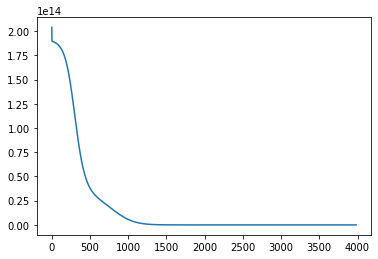

In [159]:
#updates of the loss
#update number

a = np.arange(0,iteration+1,1)
b = np.flip(loss_history)
b = (b - 22.298851605)/(0.000000000001)

plt.plot(a,b)
plt.show()

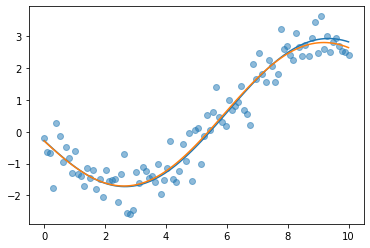

In [161]:
y_truth = 2 * np.sin(0.5*x-3)+0.1*x

B_result = B_result.reshape(1,-1)
    
B0 = B_result[0,0] 
B1 = B_result[0,1]
B2 = B_result[0,2]
B3 = B_result[0,3]

y_fitted = B0*np.sin(B1*x-B2)+B3*x

plt.scatter(x,y, alpha=0.5)
plt.plot(x,y_truth)
plt.plot(x,y_fitted)
plt.show()

In [220]:
df = pd.read_csv('data5.csv')

In [221]:
def calc_gradient2(B, y, x):
    #depends on the dimmension of B
    
    B = B.reshape(1,-1)

    B0 = B[0,0] 
    B1 = B[0,1]
    
    f0 =  -2*np.exp(B0+B1*x) * (y-np.exp(B0+B1*x)) # dR/dB_0    -2e^{B_0+B_1x}\left(y-e^{B_0+B_1x}\right)
    f1 =  -2*np.exp(B1*x+B0)* x * (y-np.exp(B0+B1*x)) # dR/dB_1 -2e^{B_1x+B_0}x\left(y-e^{B_0+B_1x}\right)
    
    return np.array([np.sum(f0), np.sum(f1)])

def calc_Jacobian(B, y, x):
    #depends on the dimmension of B
    
    B0 = B[0,0]
    B1 = B[0,1]
    
    df0b0 = -2*(np.exp(B0+B1*x)*y-2*np.exp(2*B1*x+2*B0)) # df0 / dB_0  -2\left(e^{B_0+B_1x}y-2e^{2B_1x+2B_0}\right)
    df0b1 = -2*(np.exp(B0+B1*x)*x*y-2*np.exp(2*B1*x+2*B0)*x) # df0 / dB_1 -2\left(e^{B_0+B_1x}xy-2e^{2B_1x+2B_0}x\right)
    df1b0 = -2*x*(np.exp(B1*x+B0)*y-2*np.exp(2*B1*x+2*B0)) # df1 / dB_0   -2x\left(e^{B_1x+B_0}y-2e^{2B_1x+2B_0}\right)
    df1b1 = -2*x*(np.exp(B1*x+B0)*x*y - 2*np.exp(2*B1*x+2*B0)*x) # df1 / dB_1  -2x\left(e^{B_1x+B_0}xy-2e^{2B_1x+2B_0}x\right)

    return np.array([
            [np.sum(df0b0), np.sum(df0b1)], 
            [np.sum(df1b0), np.sum(df1b1)]
            ])


In [222]:
def newton_raphson(x, y, B, max_iter):
    
    loss_history = []
    iteration = 0
    B_history = [B]

        
    for i in range(max_iter):
        B = B.reshape(1,-1)
    
        B0 = B[0,0] 
        B1 = B[0,1]
        
        y_hat = np.exp(B0 + B1*x)
        loss = np.sum((y - y_hat)**2)
                            
        #stop if there are no improvements in the loss
        if iteration > 0:
            if np.abs(loss - loss_history[0]) == 0:
                iteration = iteration - 1
                break   
        
        #keep track of the loss for each iteration
        loss_history.insert(0,loss)
                
        gradient = calc_gradient2(B,y,x)
        Jacobian = calc_Jacobian(B,y,x)
        diff = np.matmul(np.linalg.inv(Jacobian),gradient)
        
        B = B - diff
        B_history.append(B)

        iteration = iteration + 1       
        
        
                
    return loss, B, iteration, loss_history, B_history

In [223]:
B = np.array([0.5, 0.75])
x = df['x']
y = df['y']

In [224]:
result = newton_raphson(x, y, B, 10)

In [254]:
#10 Fold CV
x = df['x']
y = df['y']
B = np.array([0.5, 0.75])
B = B.reshape(1,-1)
#kf_df = pd.DataFrame(zip(x,y), columns = ['x', 'y'])

from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
kf_rmse = []

for train, test in kf.split(df):
    X_train = df.iloc[train].loc[:, df.columns != 'y']
    X_train = X_train.squeeze()
    X_test = df.iloc[test].loc[:, df.columns != 'y']
    y_train = df.iloc[train].loc[:,'y']
    y_test = df.iloc[test].loc[:,'y']

    nr = newton_raphson(X_train,y_train,B,10000)
    
    y_hat = np.exp(nr[1][0,1] + nr[1][0,1]*X_test)
    kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))

kf_RMSE = (1/10) * np.sum(kf_rmse)

In [255]:
kf_RMSE

1.9276722948217175